In [24]:
# Importing important libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


## Data Gathering

In [2]:
df = pd.read_csv("diminos_data.csv")
df

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


## EDA

In [3]:
df.shape

(15000, 3)

In [5]:
df.info() # Check Null and Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [6]:
df.describe() # display summary statistics for a dataframe

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [7]:
df.duplicated().sum() # display duplicate values

0

In [8]:
df.isna().sum() # display null values 

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [9]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [10]:
import datetime 
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [12]:
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])

In [17]:
# Days at order placed

In [15]:
df['days_at_order_placed']=df['order_placed_at'].dt.strftime('%A')

In [18]:
df

,order_id,order_placed_at,order_delivered_at,days_at_order_placed
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday
...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,Monday
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,Monday
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,Monday
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,Monday


In [19]:
## Time

In [20]:
df['time_order_placed_at']=df['order_placed_at'].dt.time
df['days_at_order_delivered']= df['order_delivered_at'].dt.strftime('%A')
df['time_order_delivered_at']=df['order_delivered_at'].dt.time
df

,order_id,order_placed_at,order_delivered_at,days_at_order_placed,time_order_placed_at,days_at_order_delivered,time_order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,00:00:59,Wednesday,00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,00:03:59,Wednesday,00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,00:07:22,Wednesday,00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,00:07:47,Wednesday,00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,00:09:03,Wednesday,00:25:13.619056
...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,Monday,23:37:05,Monday,23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,Monday,23:47:38,Tuesday,00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,Monday,23:50:16,Tuesday,00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,Monday,23:52:44,Tuesday,00:08:41.810358


In [27]:
df['order_placed_at'].dt.week
df['week_order_placed_at'] = (df['order_placed_at'].dt.weekofyear - df['order_placed_at'].dt.weekofyear.min()) + 1

In [28]:
df

,order_id,order_placed_at,order_delivered_at,days_at_order_placed,time_order_placed_at,days_at_order_delivered,time_order_delivered_at,week_order_placed_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,00:00:59,Wednesday,00:18:07.443132,1
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,00:03:59,Wednesday,00:19:34.925241,1
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,00:07:22,Wednesday,00:22:28.291385,1
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,00:07:47,Wednesday,00:46:19.019399,1
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,00:09:03,Wednesday,00:25:13.619056,1
...,...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,Monday,23:37:05,Monday,23:52:37.409378,5
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,Monday,23:47:38,Tuesday,00:04:22.672912,5
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,Monday,23:50:16,Tuesday,00:05:40.676238,5
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,Monday,23:52:44,Tuesday,00:08:41.810358,5


In [29]:
df['time_order_placed_at']=pd.to_datetime(df['order_placed_at'], format='%H:%M').dt.time
df['time_order_delivered_at']=pd.to_datetime(df['order_delivered_at'], format='%H:%M').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 15000 non-null  int64         
 1   order_placed_at          15000 non-null  datetime64[ns]
 2   order_delivered_at       15000 non-null  datetime64[ns]
 3   days_at_order_placed     15000 non-null  object        
 4   time_order_placed_at     15000 non-null  object        
 5   days_at_order_delivered  15000 non-null  object        
 6   time_order_delivered_at  15000 non-null  object        
 7   week_order_placed_at     15000 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 937.6+ KB


In [31]:
## Lead Time

In [32]:
df['time_take']=df['order_delivered_at'] - df['order_placed_at']

In [33]:
df

,order_id,order_placed_at,order_delivered_at,days_at_order_placed,time_order_placed_at,days_at_order_delivered,time_order_delivered_at,week_order_placed_at,time_take
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,00:00:59,Wednesday,00:18:07.443132,1,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,00:03:59,Wednesday,00:19:34.925241,1,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,00:07:22,Wednesday,00:22:28.291385,1,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,00:07:47,Wednesday,00:46:19.019399,1,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,00:09:03,Wednesday,00:25:13.619056,1,0 days 00:16:10.619056
...,...,...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,Monday,23:37:05,Monday,23:52:37.409378,5,0 days 00:15:32.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,Monday,23:47:38,Tuesday,00:04:22.672912,5,0 days 00:16:44.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,Monday,23:50:16,Tuesday,00:05:40.676238,5,0 days 00:15:24.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,Monday,23:52:44,Tuesday,00:08:41.810358,5,0 days 00:15:57.810358


In [35]:
df_filtered = df[df['time_take'] > datetime.timedelta(minutes=30)]
len(df_filtered)

604

##  Analysis

<AxesSubplot:xlabel='days_at_order_placed', ylabel='count'>

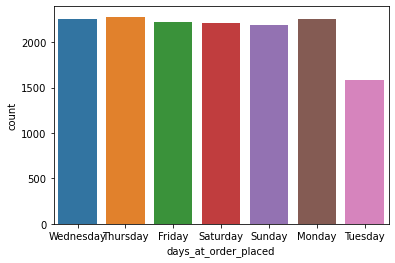

In [36]:
sns.countplot(x=df['days_at_order_placed'])

In [37]:
df['days_at_order_placed'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: days_at_order_placed, dtype: int64

In [38]:
df['week_order_placed_at'].value_counts()

2    3999
4    3935
3    3725
1    2790
5     551
Name: week_order_placed_at, dtype: int64

<AxesSubplot:xlabel='week_order_placed_at', ylabel='count'>

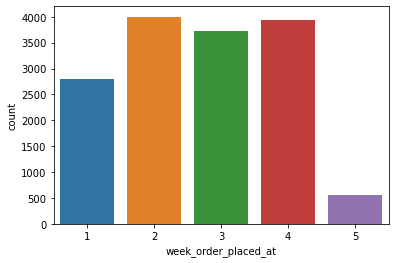

In [39]:
sns.countplot(x=df['week_order_placed_at'])

In [43]:
# Minimum Time taken
df['time_take'].min()

Timedelta('0 days 00:15:00.000620')

In [44]:
# Maximum Time Taken
df['time_take'].max()

Timedelta('5 days 01:39:49.882496')

In [45]:
#Mean Time taken
df['time_take'].mean()

Timedelta('0 days 00:20:29.963359588')

In [46]:
df['time_take'].median()

Timedelta('0 days 00:15:47.879164')

In [47]:
df['date']=df['order_placed_at'].dt.date
df['date'].value_counts()

2023-03-20    597
2023-03-22    591
2023-03-02    588
2023-03-10    587
2023-03-23    583
2023-03-06    582
2023-03-12    582
2023-03-08    578
2023-03-07    570
2023-03-04    567
2023-03-24    565
2023-03-09    564
2023-03-18    559
2023-03-27    551
2023-03-05    551
2023-03-01    550
2023-03-25    547
2023-03-16    545
2023-03-15    540
2023-03-17    537
2023-03-11    536
2023-03-03    534
2023-03-26    532
2023-03-19    526
2023-03-13    526
2023-03-21    520
2023-03-14    492
Name: date, dtype: int64

<AxesSubplot:xlabel='count', ylabel='date'>

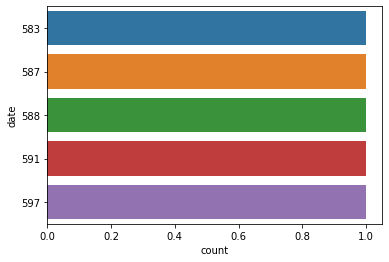

In [48]:
sns.countplot(y=df['date'].value_counts()[:5] )

<AxesSubplot:ylabel='time_take'>

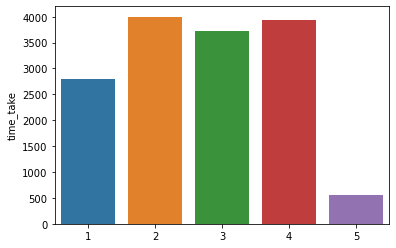

In [51]:
x=df.groupby('week_order_placed_at')['time_take'].count()
sns.barplot(x=[1,2,3,4,5],y=x)

<Figure size 720x720 with 0 Axes>

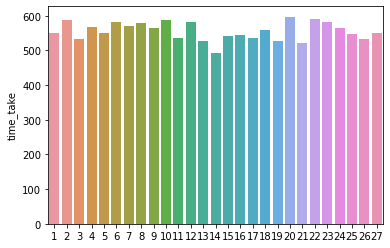

<Figure size 720x720 with 0 Axes>

In [52]:
b=df.groupby('date')['time_take'].count().reset_index()
sns.barplot(y=b['time_take'],x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])
plt.figure(figsize=(10,10))

## Interpretation

->The time taken for delivery varied between 15 minutes and 5 days, 1 hour, 39 minutes, and 49.882496 seconds. On average, orders were delivered in 20 minutes and 29.96 seconds, with half of all orders being delivered in less than 15 minutes and 47.88 seconds. These findings suggest that the business generally has a quick turnaround time for order delivery, but there is room for improvement to ensure consistency and minimize longer delivery times.

->The analysis also reveals that the maximum number of orders were delivered on 20th March, while the minimum number of orders were delivered on 14th March. This can help the business to plan their resources and operations accordingly.

->The analysis also shows that Thursday and Wednesday were the days with the maximum number of orders delivered. Additionally, the second and fourth weeks of the month had the maximum number of orders delivered, which can help the business to plan their inventory and staffing accordingly.